In [1]:
import numpy as np
import h5py
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

In [2]:
import os
PATH = './out_2/'

#load .h5 images from local folder
def loadImageh5(name):
    with h5py.File(PATH+name, 'r') as img:
        return np.array(img['img'], dtype=np.single)

imgs = []
for i in os.listdir(PATH):
    imgs.append(loadImageh5(i))

In [3]:
#checking the shape of the .h5 images
input_shape = imgs[0].shape
print(input_shape)

(224, 150, 163)


In [6]:
#Extracting RGB from .h5 images (wavelenghts were arbitrarily chosen: R-793nm,
#G-331nm and B-163nm). We divide those values because RGB channels are 8 bit each 
RGBimg = []
for i in imgs:
    RGBimg.append(i[[793//8, 331//8, 163//8], :, :]) 

#printing out RGBimg shape to confirm we got an image with 3 channels instead of 224
print(RGBimg[0].shape)

(3, 150, 163)


In [7]:
from sklearn.model_selection import train_test_split

#splitting the train and test data (inputs(x) are RGB and outputs are .h5(hyperspectral))
train_x, test_x, train_y, test_y = train_test_split(RGBimg, imgs, test_size = 0.15, random_state = 69, shuffle = True)

print(np.array(train_x[0]).shape)
print(np.array(test_x[0]).shape)
print(len(train_x))
print(len(test_x))

(3, 148, 164)
(3, 148, 163)
45
8


In [8]:
#turns pictures to pixles and returns pixels 
def toPix(arr):
    pix = []
    information = []
    for im in arr:
        ch, w, h = im.shape
        information.append([ch, w, h])
        im2 = np.fliplr(np.moveaxis(im, 0, -1))
        pix.extend([px for row in im2 for px in row])
    return pix, information

train_x, trainX_information = toPix(train_x)
train_y, trainY_information = toPix(train_y)
test_x, testX_information = toPix(test_x)
test_y, testY_information = toPix(test_y)

print(len(train_x), len(train_y), len(test_x), len(test_y))

#arrays with information what was the shape (channels, width, height) of every image
print(trainX_information, trainY_information, testX_information, testY_information)

1073917 1073917 195385 195385
[[3, 148, 164], [3, 143, 163], [3, 151, 163], [3, 146, 164], [3, 148, 165], [3, 153, 164], [3, 148, 163], [3, 150, 163], [3, 148, 163], [3, 142, 164], [3, 146, 147], [3, 151, 163], [3, 136, 164], [3, 151, 164], [3, 153, 164], [3, 152, 164], [3, 147, 164], [3, 152, 163], [3, 146, 163], [3, 142, 149], [3, 155, 163], [3, 150, 164], [3, 151, 163], [3, 149, 163], [3, 144, 163], [3, 138, 152], [3, 135, 162], [3, 151, 165], [3, 124, 166], [3, 147, 163], [3, 150, 164], [3, 147, 163], [3, 152, 163], [3, 151, 163], [3, 149, 164], [3, 145, 164], [3, 116, 164], [3, 145, 165], [3, 154, 162], [3, 149, 164], [3, 146, 164], [3, 150, 164], [3, 151, 163], [3, 155, 161], [3, 148, 163]] [[224, 148, 164], [224, 143, 163], [224, 151, 163], [224, 146, 164], [224, 148, 165], [224, 153, 164], [224, 148, 163], [224, 150, 163], [224, 148, 163], [224, 142, 164], [224, 146, 147], [224, 151, 163], [224, 136, 164], [224, 151, 164], [224, 153, 164], [224, 152, 164], [224, 147, 164], [224

In [9]:
#making the model so that the input is RGB and the output is 224 channels
input = layers.Input(shape=(3))

decoded = layers.Dense(14, activation='relu')(input)
decoded = layers.Dense(37, activation='relu')(decoded)
decoded = layers.Dense(69, activation='relu')(decoded)
decoded = layers.Dense(102, activation='relu')(decoded)
decoded = layers.Dense(146, activation='relu')(decoded)
decoded = layers.Dense(224, activation='sigmoid')(decoded)

autoencoder = keras.Model(input, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense (Dense)               (None, 14)                56        
                                                                 
 dense_1 (Dense)             (None, 37)                555       
                                                                 
 dense_2 (Dense)             (None, 69)                2622      
                                                                 
 dense_3 (Dense)             (None, 102)               7140      
                                                                 
 dense_4 (Dense)             (None, 146)               15038     
                                                                 
 dense_5 (Dense)             (None, 224)               32928 

In [10]:
#start training with 100 epochs
autoencoder.fit(np.array(train_x), np.array(train_y),
                epochs=100,
                batch_size=256,
                verbose = True,
                shuffle=False)

Epoch 1/100
4195/4195 [==============================] - 11s 2ms/step - loss: 0.0053
Epoch 2/100
4195/4195 [==============================] - 10s 2ms/step - loss: 0.0022
Epoch 3/100
4195/4195 [==============================] - 10s 2ms/step - loss: 0.0020
Epoch 4/100
4195/4195 [==============================] - 10s 2ms/step - loss: 0.0019
Epoch 5/100
4195/4195 [==============================] - 10s 2ms/step - loss: 0.0018
Epoch 6/100
4195/4195 [==============================] - 10s 2ms/step - loss: 0.0018
Epoch 7/100
4195/4195 [==============================] - 10s 2ms/step - loss: 0.0018
Epoch 8/100
4195/4195 [==============================] - 10s 2ms/step - loss: 0.0018
Epoch 9/100
4195/4195 [==============================] - 10s 2ms/step - loss: 0.0018
Epoch 10/100
4195/4195 [==============================] - 10s 2ms/step - loss: 0.0018
Epoch 11/100
4195/4195 [==============================] - 10s 2ms/step - loss: 0.0018
Epoch 12/100
4195/4195 [==============================] - 10s 2

4195/4195 [==============================] - 13s 3ms/step - loss: 0.0018
Epoch 97/100
4195/4195 [==============================] - 13s 3ms/step - loss: 0.0018
Epoch 98/100
4195/4195 [==============================] - 13s 3ms/step - loss: 0.0018
Epoch 99/100
4195/4195 [==============================] - 13s 3ms/step - loss: 0.0018
Epoch 100/100
4195/4195 [==============================] - 13s 3ms/step - loss: 0.0018


In [12]:
#evaluating the created model on test data
autoencoder.evaluate(np.array(test_x), 
               np.array(test_y), 
               batch_size=256,  
               verbose=2)

764/764 - 1s - loss: 0.0021 - 1s/epoch - 2ms/step


0.002141782082617283

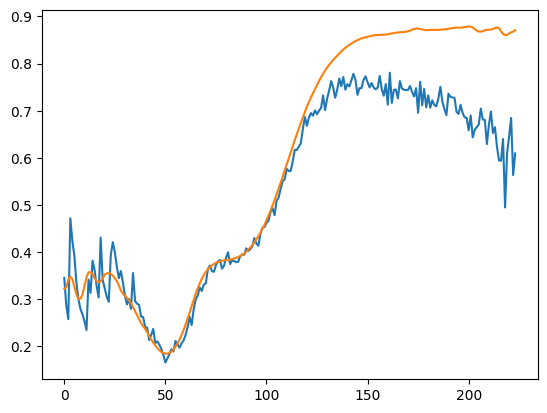

In [21]:
#plotting a graph: blue line - groung truth, orange - what the model predicted
plt.plot(range(224), test_y[0], label = "label") 
plt.plot(range(224), autoencoder(np.array([test_x[0]]))[0], label = "label")

In [34]:
#this image will be used as ground truth for plotting it in the end
print(np.array(RGBimg[25]).shape)
print(np.array(RGBimg[25]))

(3, 148, 163)
[[[0.78095174 0.54052186 0.45902985 ... 1.0118771  1.00428    0.99753124]
  [0.603936   0.537057   0.4898602  ... 0.985336   0.9941698  1.0042037 ]
  [0.49286732 0.51973253 0.50356257 ... 0.99860656 0.9874296  0.97751385]
  ...
  [0.24296276 0.2321472  0.27062207 ... 0.7464667  0.7144542  0.63721895]
  [0.23255008 0.22175255 0.26034528 ... 0.76305485 0.6942338  0.6338827 ]
  [0.24643366 0.2564014  0.26377088 ... 0.7696901  0.7717453  0.6739174 ]]

 [[0.62987405 0.26564345 0.1493652  ... 1.0027217  0.98967296 1.0046593 ]
  [0.539892   0.22136953 0.17923824 ... 0.9454233  1.0183592  1.0192195 ]
  [0.419916   0.20661156 0.20911129 ... 0.9740725  0.9609868  1.0046593 ]
  ...
  [0.11997601 0.11806375 0.11949217 ... 0.6875806  0.6454389  0.61153173]
  [0.104979   0.11806375 0.10455564 ... 0.7162298  0.70281124 0.59697145]
  [0.104979   0.11806375 0.11949217 ... 0.6875806  0.6741251  0.61153173]]

 [[0.6151743  0.27229407 0.27378508 ... 1.0638298  1.0974822  0.98489827]
  [0.546

In [35]:
print(autoencoder(np.array([test_x[0]])))

tf.Tensor(
[[0.32189694 0.32544062 0.34147668 0.34813923 0.34203306 0.3265559
  0.31098497 0.29979724 0.3011339  0.31011787 0.3280889  0.34626263
  0.3570747  0.35761058 0.35353202 0.3445915  0.33831128 0.3357023
  0.33829167 0.3436806  0.35265607 0.3546045  0.35593772 0.35386914
  0.34987336 0.3447391  0.33839136 0.3291439  0.31863093 0.31144083
  0.30697018 0.30320504 0.29765907 0.29101655 0.28330812 0.27505824
  0.26644897 0.25781953 0.24912171 0.24322282 0.2367572  0.23027432
  0.22188666 0.21445438 0.20799206 0.20173907 0.19618057 0.19175732
  0.18794854 0.18592197 0.18446869 0.18464226 0.18614772 0.18876812
  0.19325785 0.19906434 0.20585214 0.21421039 0.22390603 0.23451322
  0.24620354 0.25874177 0.27197605 0.2850579  0.29856348 0.31159455
  0.32331038 0.3337666  0.3430997  0.35110816 0.3580761  0.36351666
  0.36793488 0.37171564 0.3747384  0.37728944 0.37883922 0.38019365
  0.38131633 0.38263693 0.38320097 0.3836589  0.3846297  0.38510603
  0.38642764 0.38780144 0.38943002 0.39

In [37]:
# Next few cells are just an example of recreating an RGB image from the hyperspectral 
# pixels we got with the model, to showcase it againts the ground truth image

# step1: get the number of pixels that are inside the image we want to showcase
# to get the number we multiply the dimentions of the image (width x height)
# for easier implementation we will use the first image from the test set
# which is 148x163 so we need to get all of the pixels from the begining up to
# 148x163 = 24124 position
step1 = autoencoder(np.array(test_x))[:24124]
print(step1)

tf.Tensor(
[[0.3218969  0.32544062 0.34147668 ... 0.86631584 0.867768   0.8708697 ]
 [0.28558898 0.28614172 0.30096567 ... 0.86381114 0.86569196 0.86836594]
 [0.29298088 0.29235694 0.30639213 ... 0.87706035 0.87858814 0.8809328 ]
 ...
 [0.25184917 0.25526774 0.27165252 ... 0.86679864 0.86847556 0.8707221 ]
 [0.23315966 0.24012591 0.25796935 ... 0.8641735  0.8658263  0.8679509 ]
 [0.51898336 0.49726924 0.49126533 ... 0.8765712  0.87802076 0.8803529 ]], shape=(24124, 224), dtype=float32)


In [38]:
#step2: reverse all the pixels from each row so that the pixels are in the right
# order, for the colours to be accurate
step2 = step1[...,::-1]
print(step2)

tf.Tensor(
[[0.8708697  0.867768   0.86631584 ... 0.34147668 0.32544062 0.3218969 ]
 [0.86836594 0.86569196 0.86381114 ... 0.30096567 0.28614172 0.28558898]
 [0.8809328  0.87858814 0.87706035 ... 0.30639213 0.29235694 0.29298088]
 ...
 [0.8707221  0.86847556 0.86679864 ... 0.27165252 0.25526774 0.25184917]
 [0.8679509  0.8658263  0.8641735  ... 0.25796935 0.24012591 0.23315966]
 [0.8803529  0.87802076 0.8765712  ... 0.49126533 0.49726924 0.51898336]], shape=(24124, 224), dtype=float32)


In [39]:
#step 3 and 4: make a NumPy array from the data we got in step2, reshape it so 
# that the dimentions of the image match and append it to an empty array
step4 = []
step3 = np.array(step2)
step4.append(np.reshape(step3, (148, 163, 224)))
print(step4)

[array([[[0.8708697 , 0.867768  , 0.86631584, ..., 0.34147668,
         0.32544062, 0.3218969 ],
        [0.86836594, 0.86569196, 0.86381114, ..., 0.30096567,
         0.28614172, 0.28558898],
        [0.8809328 , 0.87858814, 0.87706035, ..., 0.30639213,
         0.29235694, 0.29298088],
        ...,
        [0.84818685, 0.8444123 , 0.842508  , ..., 0.23985477,
         0.22056572, 0.20728162],
        [0.8700382 , 0.8669338 , 0.86566   , ..., 0.34215382,
         0.3253197 , 0.32096466],
        [0.87276477, 0.87026006, 0.86936206, ..., 0.51503956,
         0.51839083, 0.5405332 ]],

       [[0.86863464, 0.86547434, 0.8639554 , ..., 0.3480383 ,
         0.33201417, 0.32842788],
        [0.87897867, 0.87686515, 0.87530667, ..., 0.30125013,
         0.28640276, 0.2860141 ],
        [0.86953974, 0.8669668 , 0.86518246, ..., 0.3003419 ,
         0.28533742, 0.28477103],
        ...,
        [0.63760096, 0.63580096, 0.6331603 , ..., 0.15671568,
         0.13984527, 0.13160981],
        [0.

In [40]:
# checking what shape is step4
print(np.array(step4).shape)

(1, 148, 163, 224)


In [41]:
# step5: we need to flip the order of numbers of the shape 
# the order we are looking for is (1, 224, 148, 163)
step5 = np.fliplr(np.moveaxis(step4,-1, 0))
print(step5.shape)

(224, 1, 148, 163)


In [42]:
# step6: repeat step5 to get the wanted shape: (1, 224, 148, 163)
step6 = np.fliplr(np.moveaxis(step5,1, 0))
print(step6.shape)

(1, 224, 148, 163)


In [43]:
# step7: convert hyperspectral pixels to RGB so that we can showcase it easily
RGBimgTest = []
for i in step6:
    RGBimgTest.append(i[[793//8, 331//8, 163//8], :, :])
print(RGBimgTest[0].shape)

(3, 148, 163)


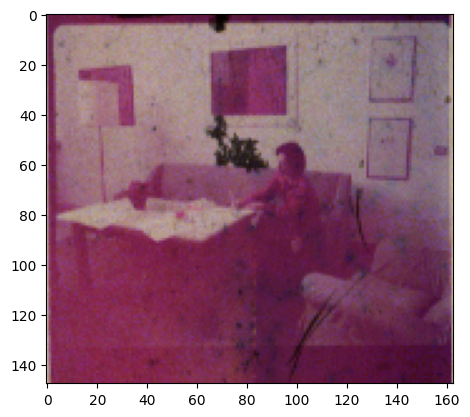

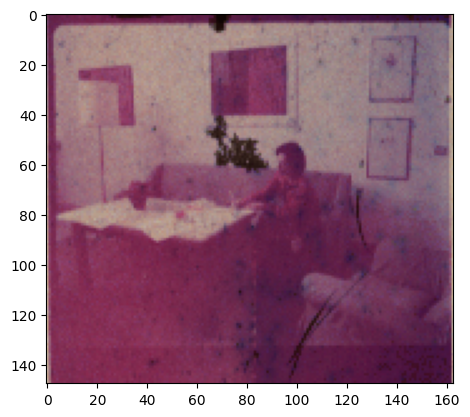

(<matplotlib.image.AxesImage at 0x1ef2ff05748>, None)

In [60]:
# step8: plot the ground truth image: RGB, and the one we got with training 
# the model: ImageFinally
RGB = np.fliplr(np.moveaxis(RGBimg[25], 0, -1))
plt.imshow(RGB),plt.show()
ImageFinally = np.fliplr(np.moveaxis(RGBimgTest[0], 0, -1))
plt.imshow(np.fliplr(ImageFinally)),plt.show()

In [63]:
print(ImageFinally.shape)
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

mse(RGB, np.fliplr(ImageFinally))

(148, 163, 3)


0.0013206611582714809